# One-factor analysis of variance (one-way ANOVA)

# In brevi

The purpose of this repository is to illustrate a one-factor analysis of variance (one-way ANOVA). In addition there are statistical and graphical analyses.

# Data

Download the data file.

[anova_one_factor.csv](https://drive.google.com/open?id=1smA0Brf2BiHUugRUhQWCiEj5hbyYv1DS)

# Methodology

Various data munging operations are performed using pandas.

In [1]:
from datetime import datetime
start_time = datetime.now()

In [2]:
# Import the required librairies.
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import numpy as np

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Declare constants
confidence_level = 0.95

In [4]:
# Read the data file.
# y is the column of response values.
# x is the column of factor levels, as numbers.
# w is the column of factor levels, as text.
df = pd.read_csv('anova_one_factor.csv')
df.columns

Index(['y', 'x', 'w'], dtype='object')

In [5]:
# How many levels for factor x?
df['x'].unique()

array([1, 3, 2])

In [6]:
# How many levels for factor w?
df['w'].unique()

array(['A', 'C', 'B'], dtype=object)

In [7]:
# Calculate basic statistics for y by group within x.
groupby_x = df['y'].groupby(df['x'])
groupby_x.describe()

,count,mean,std,min,25%,50%,75%,max
x,,,,,,,,
1,603.0,81.527902,5.102107,62.44,78.891667,81.60,84.54,99.12
2,159.0,79.875484,4.842203,66.62,76.770000,79.50,82.48,94.66
3,17.0,81.715294,4.065670,76.14,78.360000,81.04,85.90,88.62


In [8]:
# Calculate basic statistics for y by group within w.
groupby_w = df['y'].groupby(df['w'])
groupby_w.describe()

,count,mean,std,min,25%,50%,75%,max
w,,,,,,,,
A,603.0,81.527902,5.102107,62.44,78.891667,81.60,84.54,99.12
B,159.0,79.875484,4.842203,66.62,76.770000,79.50,82.48,94.66
C,17.0,81.715294,4.065670,76.14,78.360000,81.04,85.90,88.62


In [9]:
# This works but the answer is close, not exact.
#def average_ci(data):
#    average_conf_int = sm.stats.DescrStatsW(data).tconfint_mean(alpha=0.05,
#                                                                alternative='two-sided')
#    average_conf_int = (round(average_conf_int[0], 3), round(average_conf_int[1], 3))
#    return average_conf_int

In [10]:
def average_ci(data):
    average_conf_int = sm.stats.DescrStatsW(data).tconfint_mean(alpha=1-confidence_level,
                                                                alternative='two-sided')
    average_conf_int = (round(average_conf_int[0], 3), round(average_conf_int[1], 3))
    return average_conf_int

In [11]:
def std_dev_ci(data):
    numerator = (data.count() - 1) * data.var()
    lower_limit = np.sqrt((numerator / \
                           st.chi2.ppf((1 - confidence_level)/2,
                                       data.count() - 1)))
    upper_limit = np.sqrt(numerator / \
                          st.chi2.ppf((1- (1 - confidence_level)/2),
                                      data.count() - 1))
    std_dev_conf_int = lower_limit, upper_limit
    std_dev_conf_int = {round(std_dev_conf_int[0], 3),
                        round(std_dev_conf_int[1], 3)}
    return std_dev_conf_int

In [12]:
# Calculate specific statistics for y by group.
average_ci.__name__ = 'mean ci'
std_dev_ci.__name__ = 'std dev ci'
f = {'y' : ['count', 'mean', average_ci, 'median', 'std', std_dev_ci]}
grouped = df.groupby(['x', 'w']).agg(f)
# Create better names for the columns:
grouped.columns = [" ".join(x) for x in grouped.columns.ravel()]
grouped.round(3)

,,y count,y mean,y mean ci,y median,y std,y std dev ci
x,w,,,,,,
1,A,603,81.528,"(81.12, 81.936)",81.60,5.102,"{4.829, 5.408}"
2,B,159,79.875,"(79.117, 80.634)",79.50,4.842,"{4.362, 5.442}"
3,C,17,81.715,"(79.625, 83.806)",81.04,4.066,"{3.028, 6.188}"


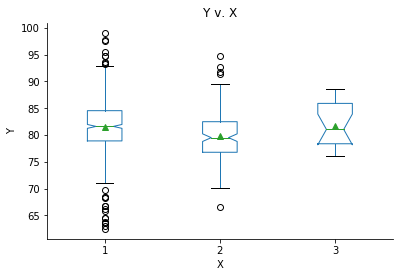

In [13]:
# Plot a box plot of y v. x.
# Add the "magic function" to render figures in a Jupyter notebook.
# This is not required in a Python script file.
%matplotlib inline
ax = df.boxplot(column='y', by='x', grid=False, notch=True,\
                       showmeans=True)
ax.get_figure().suptitle("")
ax.set_title('Y v. X')
ax.set_ylabel('Y')
ax.set_xlabel('X')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

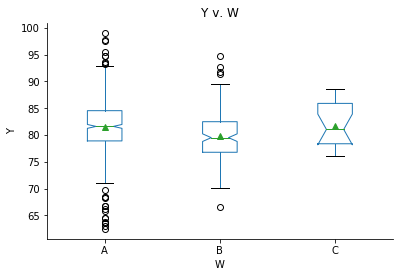

In [14]:
# Plot a box plot of y v. w.
# Add the "magic function" to render figures in a Jupyter notebook.
# This is not required in a Python script file.
%matplotlib inline
ax = df.boxplot(column='y', by='w', grid=False, notch=True,\
                       showmeans=True)
ax.get_figure().suptitle("")
ax.set_title('Y v. W')
ax.set_ylabel('Y')
ax.set_xlabel('W')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

In [15]:
# C(x) refers to x as a categorical variable.
model_x = sm.formula.ols('y ~ C(x)',data=df).fit()
anova_x_table = sm.stats.anova_lm(model_x, typ=1)
anova_x_table

,df,sum_sq,mean_sq,F,PR(>F)
C(x),2.0,348.267032,174.133516,6.880207,0.001092
Residual,776.0,19640.050954,25.309344,NaN,NaN


In [16]:
#model_x.summary() # For non-categorical X.
model_x.summary2() # For categorical X.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.015    
Dependent Variable: y                AIC:                4730.7847
Date:               2018-08-17 16:54 BIC:                4744.7588
No. Observations:   779              Log-Likelihood:     -2362.4  
Df Model:           2                F-statistic:        6.880    
Df Residuals:       776              Prob (F-statistic): 0.00109  
R-squared:          0.017            Scale:              25.309   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     81.5279    0.2049  397.9463  0.0000  81.1257  81.9301
C(x)[T.2]     -1.6524    0.4485   -3.6843  0.0002  -2.5328  -0.7720
C(x)[T.3]      0.1874    1.2372    0.1515  0.8797  -2.2413   2.6161
------------------------------------------------------------------
Omnibus:               36.419       Durbin-Watson:          0.646 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       83.640
Skew:                  -0.240       Prob(JB):               0.000 
Kurtosis:              4.532        Condition No.:          7     
==================================================================

"""

In [17]:
# C(w) refers to w as a categorical variable.
model_w = sm.formula.ols('y ~ C(w)',data=df).fit()
anova_w_table = sm.stats.anova_lm(model_w, typ=1)
anova_w_table

,df,sum_sq,mean_sq,F,PR(>F)
C(w),2.0,348.267032,174.133516,6.880207,0.001092
Residual,776.0,19640.050954,25.309344,NaN,NaN


In [18]:
#model_w.summary() # For non-categorical X.
model_w.summary2() # For categorical X.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.015    
Dependent Variable: y                AIC:                4730.7847
Date:               2018-08-17 16:54 BIC:                4744.7588
No. Observations:   779              Log-Likelihood:     -2362.4  
Df Model:           2                F-statistic:        6.880    
Df Residuals:       776              Prob (F-statistic): 0.00109  
R-squared:          0.017            Scale:              25.309   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     81.5279    0.2049  397.9463  0.0000  81.1257  81.9301
C(w)[T.B]     -1.6524    0.4485   -3.6843  0.0002  -2.5328  -0.7720
C(w)[T.C]      0.1874    1.2372    0.1515  0.8797  -2.2413   2.6161
------------------------------------------------------------------
Omnibus:               36.419       Durbin-Watson:          0.646 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       83.640
Skew:                  -0.240       Prob(JB):               0.000 
Kurtosis:              4.532        Condition No.:          7     
==================================================================

"""

# Future work

- Calculate Tukey post hoc means comparison.
- Calculate average and CI, median and CI, standard deviation and CI, for all levels of y v. x and w.

# References

[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)